In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tqdm import tqdm
import os
import subprocess
import tarfile
from random import sample
from torchsummary import summary

Populating the interactive namespace from numpy and matplotlib


In [2]:
def coors(filename):
  with open(filename) as fp:
    f = fp.read()
    f = f.split(' ')
    f = f[5:7]
    f = [float(x) for x in f]
  return tuple(f)

def folders_to_coors(folder_name):
  coor_set = set()
  for file in tqdm(os.listdir(folder_name)):
    if file[-3:] == 'txt':
      coords = coors(f'{folder_name}/{file}')
      coor_set.add(coords)
  return coor_set

In [31]:
path = '/home/src/LUMEN-Interpretability/dataset/test/Firenca'

In [32]:
df = pd.DataFrame(folders_to_coors(path))
df.columns = ['Latitude', 'Longitude']

100%|██████████| 172540/172540 [00:24<00:00, 7017.27it/s]


In [33]:
df.describe().loc[['count', 'min', 'max']]

Latitude    Longitude
count  8103.000000  8103.000000
min      43.766375    11.249009
max      43.784841    11.266194

In [34]:
images = [x for x in os.listdir(path) if x[-3:] == 'jpg']

In [35]:
chosen_imgs = sample(images, k=6*10)

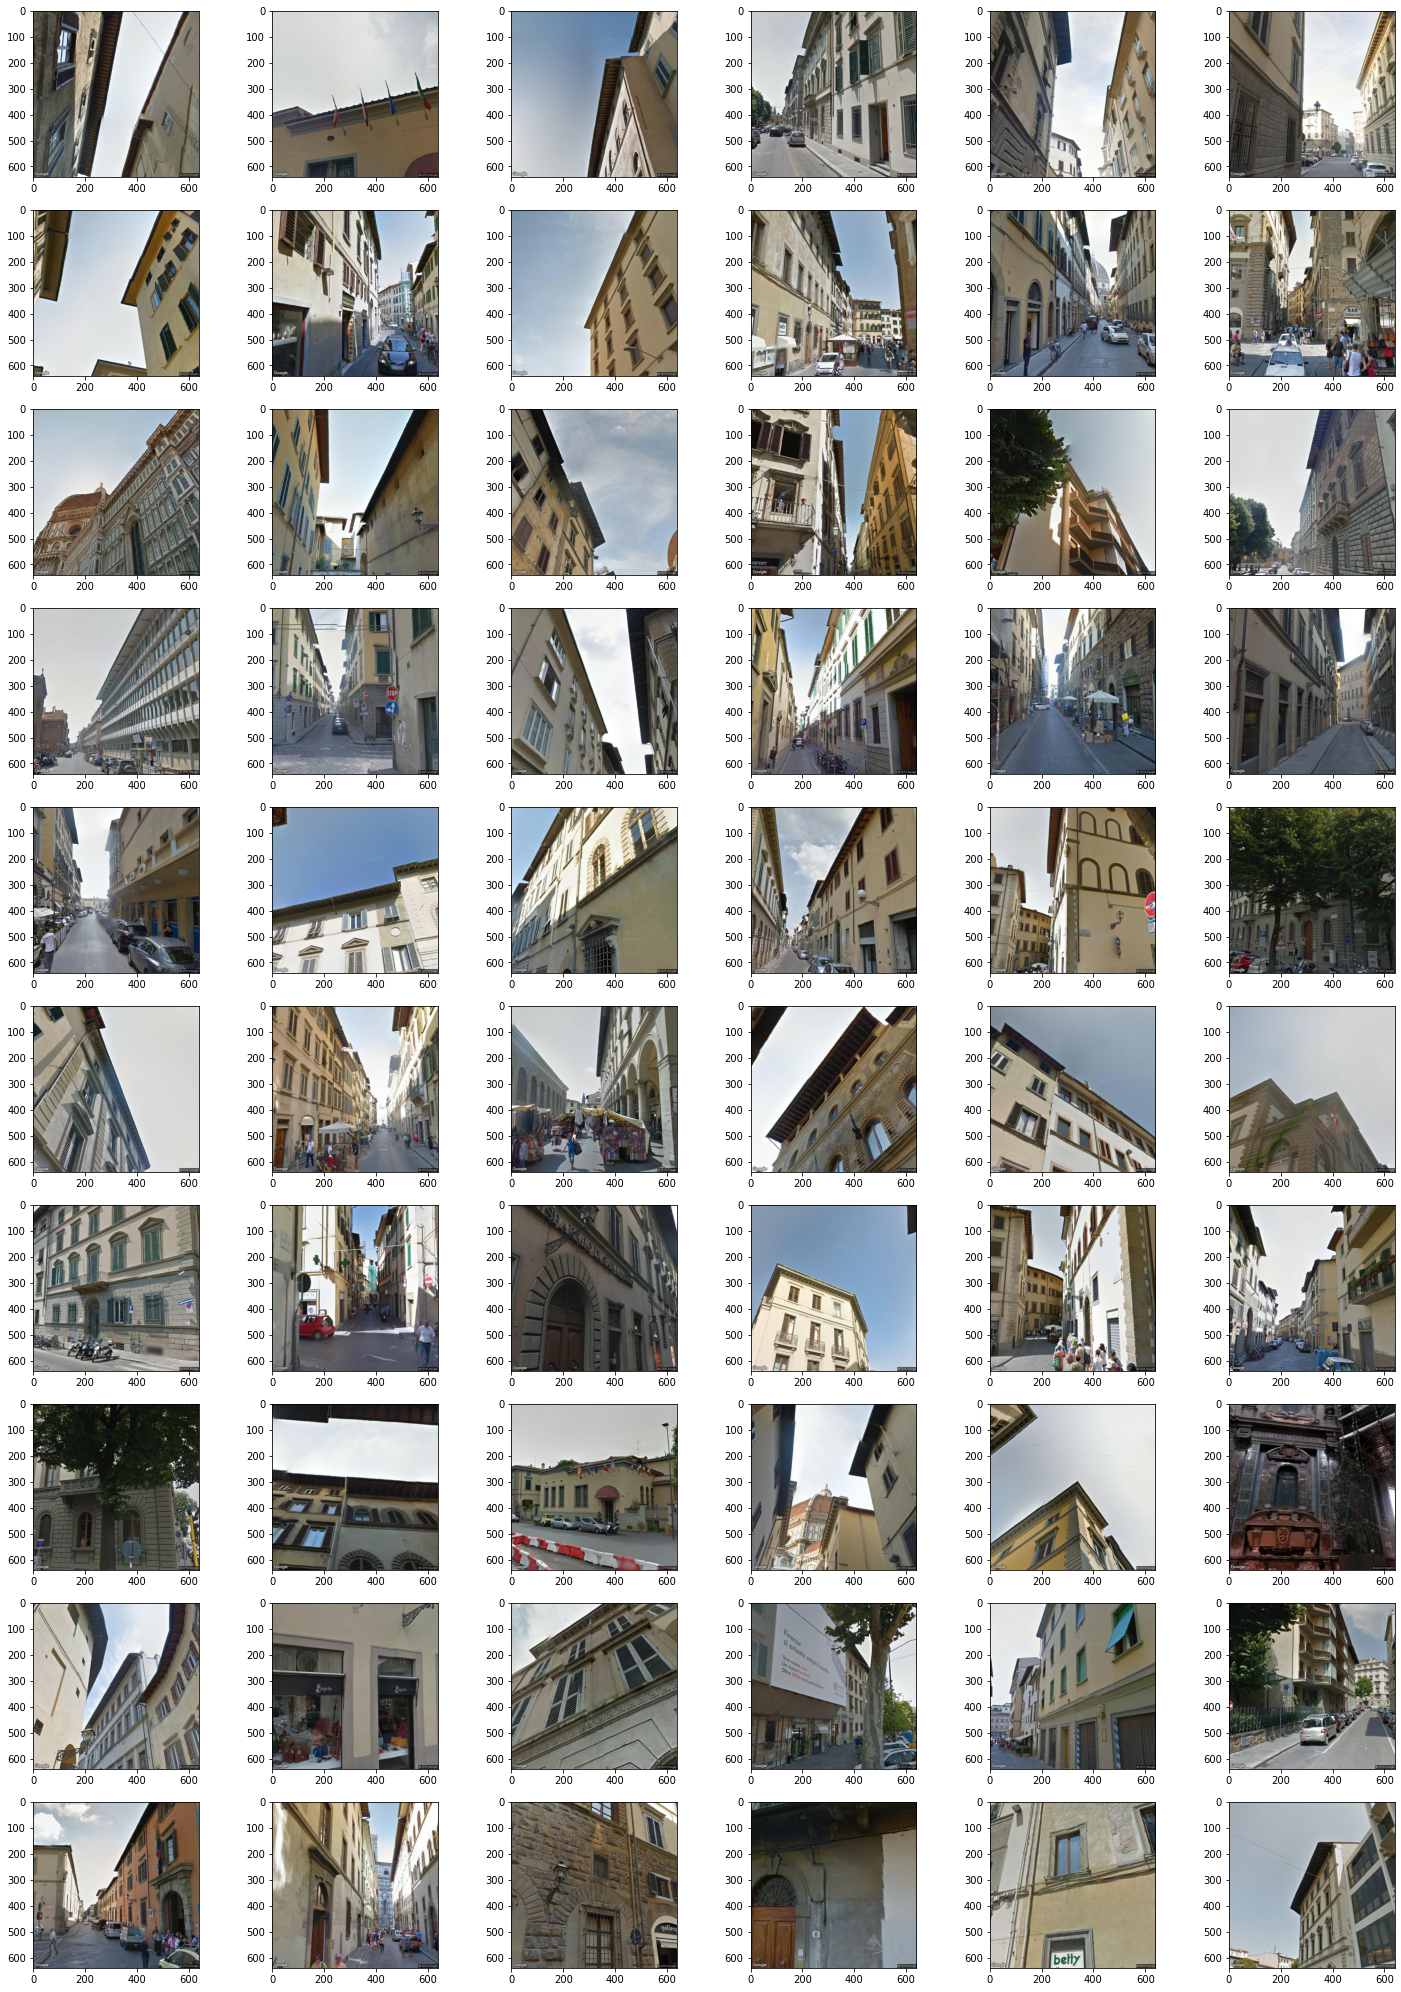

In [36]:
n_row = 10
n_col = 6
_, axs = plt.subplots(n_row, n_col, figsize=(25, 36))
axs = axs.flatten()
for img, ax in zip(chosen_imgs, axs):
  img = mpimg.imread(f'{path}/{img}')
  ax.imshow(img)
plt.show()